In [1]:
%matplotlib widget
from CG import *

In [2]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])
c = 0.0

## 3. The Quadratic Form <a id="3"></a>

A quadratic form is simply a scalar, quadratic function of a vector with the form

\begin{equation}
f(x) = \frac{1}{2} x^T A x - b^T x + c \tag{3}
\end{equation}

where $A$ is a matrix, $x$ and $b$ are vectors, and $c$ is a scalar constant. I shall show shortly that if $A$ is symmetric
and positive-definite, $f(x)$ is minimized by the solution to $Ax = b$.

Throughout this paper, I will demonstrate ideas with the simple sample problem

\begin{equation}
A = \begin{bmatrix} 3 & 2 \\ 2 & 6 \end{bmatrix},\quad b = \begin{bmatrix} 2 \\ -8 \end{bmatrix},\quad c=0 \tag{4}
\end{equation}

The system $Ax = b$ is illustrated in Figure 1. In general, the solution $x$ lies at the intersection point
of $n$ hyperplanes, each having dimension $n-1$. For this problem, the solution is $x = [2, -2]^T$. The
corresponding quadratic form $f(x)$ appears in Figure 2. A contour plot of $f(x)$ is illustrated in Figure 3.

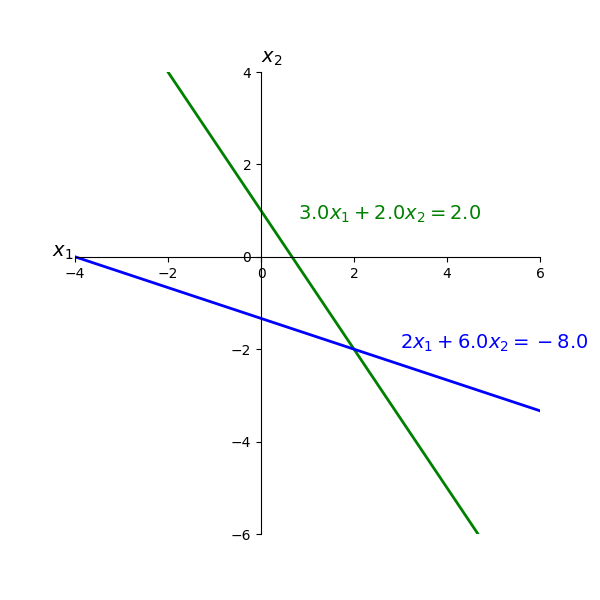

In [3]:
plotAb2D(A, b)

<center>Figure 1: Sample two-dimensional linear system. The solution lies at the intersection of the lines.</center>

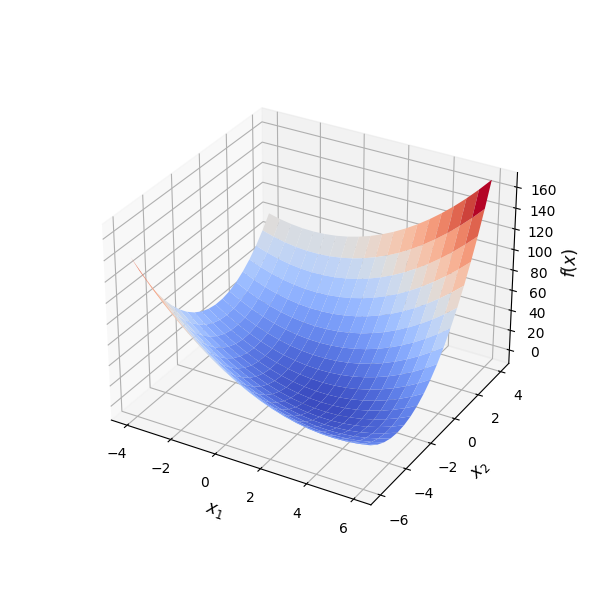

In [4]:
plotAbc3D(A, b, c)

<center>Figure 2: Graph of a quadratic form $f(x)$. The minimum point of this surface is the solution to $Ax=b$.</center>

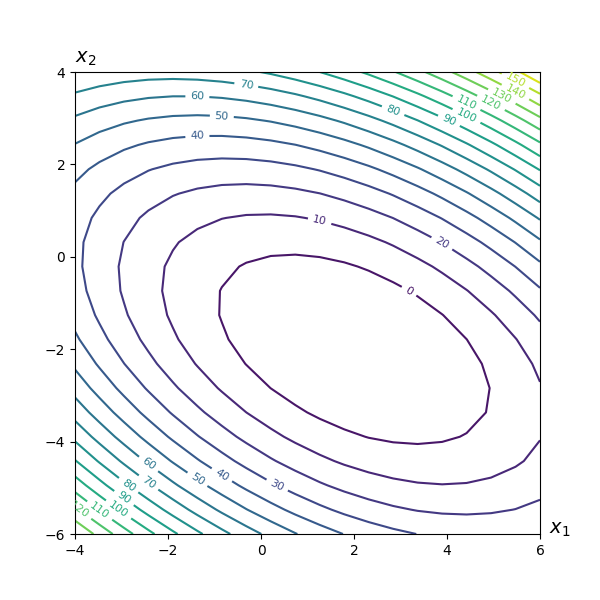

In [5]:
plotcontours(A, b, c)

<center>Figure 3: Contours of the quadratic form. Each ellipsoidal curve has constant $f(x)$</center>

Because $A$ is positive-definite, the surface defined by $f(x)$ is shaped like a paraboloid bowl. (I’ll have more
to say about this in a moment.)

The gradient of a quadratic form is defined to be

\begin{equation}
f'(x) = 
\begin{bmatrix}
\frac{\partial}{\partial x_1}f(x)\\
\frac{\partial}{\partial x_2}f(x)\\
\vdots\\
\frac{\partial}{\partial x_n}f(x)
\end{bmatrix}. \tag{5}
\end{equation}

The gradient is a vector field that, for a given point $x$, points in the direction of greatest increase of $f(x)$.
Figure 4 illustrates the gradient vectors for Equation 3 with the constants given in Equation 4. At the bottom
of the paraboloid bowl, the gradient is zero. One can minimize $f(x)$ by setting $f'(x)$ equal to zero.

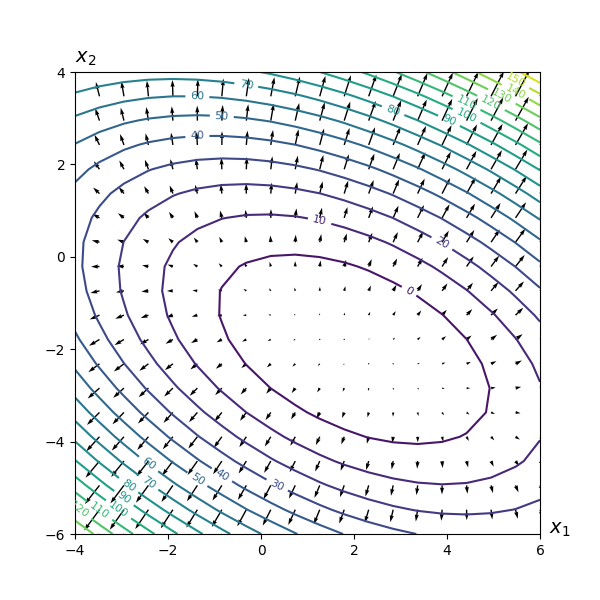

In [6]:
vectorfield(A, b, c)

<center>Figure 4: Gradient $f'(x)$ of the quadratic form. For every $x$, the gradient points in the direction of steepest
increase of $f(x)$, and is orthogonal to the contour lines.</center>

With a little bit of tedious math, one can apply Equation 5 to Equation 3, and derive

\begin{equation}
f'(x) = \frac{1}{2}A^Tx + \frac{1}{2}Ax - b. \tag{6}
\end{equation}

If $A$ is symmetric, this equation reduces to

\begin{equation}
f'(x) = Ax - b. \tag{7}
\end{equation}

Setting the gradient to zero, we obtain Equation 1, the linear system we wish to solve. Therefore, the solution to $Ax = b$ is a critical point of $f(x)$. If $A$ is positive-definite as well as symmetric, then this solution is a minimum of $f(x)$, so $Ax = b$	can be solved by finding an $x$ that minimizes $f(x)$. (If $A$ is not symmetric, then Equation 6 hints that CG will find a solution to the system $\frac{1}{2}(A^T + A)x = b$. Note that $\frac{1}{2}(A^T + A)$ is symmetric.)

Why do symmetric positive-definite matrices have this nice property? Consider the relationship between $f$ at some arbitrary point $p$ and at the solution point $x = A^{-1}b$. From Equation 3 one can show (Appendix C1) that if $A$ is symmetric (be it positive-definite or not),

\begin{equation}
f(p) = f(x) + \frac{1}{2}(p-x)^TA(p-x). \tag{8}
\end{equation}

If $A$ is positive-definite as well, then by Inequality 2, the latter term is positive for all $p \neq x$. It follows that $x$ is a global minimum of $f$.

The fact that $f(x)$ is a paraboloid is our best intuition of what it means for a matrix to be positive-definite. If $A$ is not positive-definite, there are several other possibilities. $A$ could be negative-definite — the result of negating a positive-definite matrix (see Figure 2, but hold it upside-down). $A$ might be singular, in which case no solution is unique; the set of solutions is a line or hyperplane having a uniform value for $f$. If $A$ is none of the above, then $x$ is a saddle point, and techniques like Steepest Descent and CG will likely fail. Figure 5 demonstrates the possibilities. The values of $b$ and $c$ determine where the minimum point of the paraboloid lies, but do not affect the paraboloid’s shape.

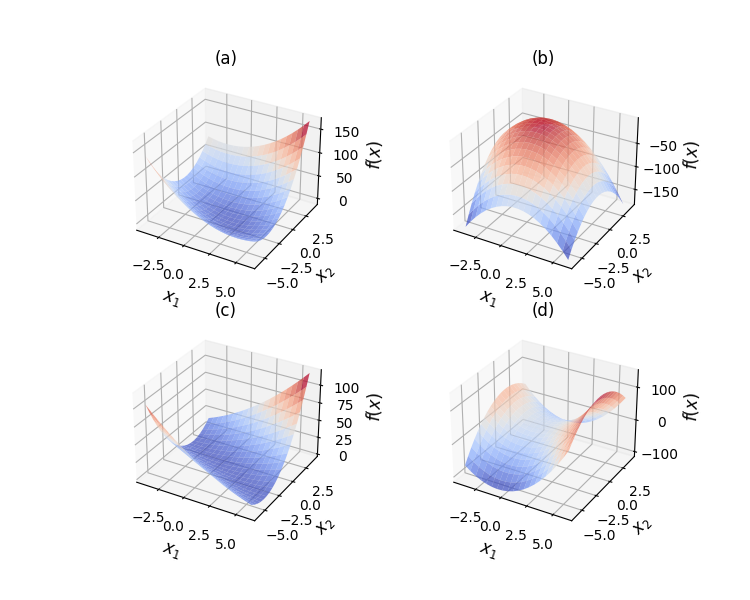

In [7]:
fig5()

<center>Figure 5: (a) Quadratic form for a positive-definite matrix. (b) For a negative-definite matrix. (c) For a singular (and positive-indefinite) matrix. A line that runs through the bottom of the valley is the set of solutions. (d) For an indefinite matrix. Because the solution is a saddle point, Steepest Descent and CG will not work. In three dimensions or higher, a singular matrix can also have a saddle.</center>

Why go to the trouble of converting the linear system into a tougher-looking problem? The methods under study — Steepest Descent and CG — were developed and are intuitively understood in terms of minimization problems like Figure 2, not in terms of intersecting hyperplanes such as Figure 1.

<html>
<hr style="height:2px;border:none;color:#228;background-color:#228;" />
<span style="color:#228">
<p><i>Additional Content - not in the original publication - added by AvS</i>

<p>Below is an interactive figure to explore our system. You can move the sliders to change $A, b$ and $c$. For this to work you will need to have the jupyter widgets (ipympl) installed.

<p>Note that changing $c$ just shifts the whole 3D surface vertically, and has no influence on the solution $x$, as shown by the intersecting lines.

<p>Also note that if $A_{01} \neq A_{10}$, i.e., $A$ is not symmetric, the solution $x$ to $Ax = b$ indicated by the intersection of the two lines is not at the minimum value of the 3D surface $f(x)$, shown by the contour lines.
</span></html>

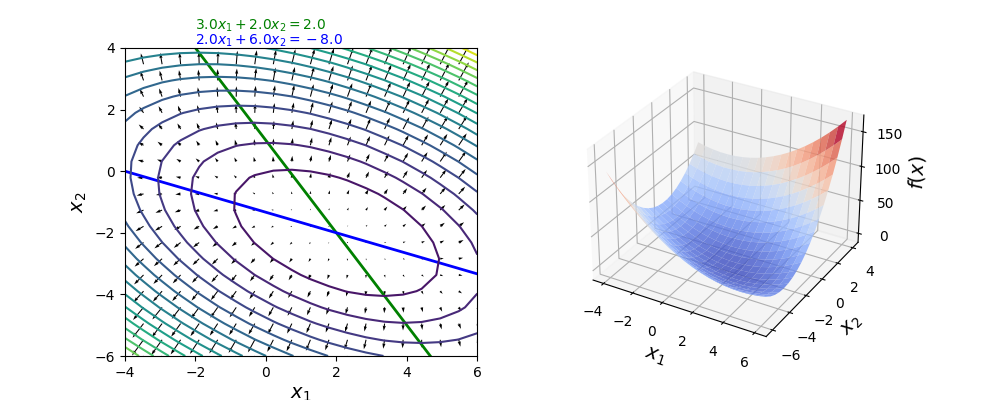

In [8]:
hdls = fig_A()

In [9]:
sliders_figA(hdls);

Box(children=(Box(children=(FloatSlider(value=3.0, max=10.0, min=-10.0), FloatSlider(value=2.0, max=10.0, min=…

<html>
<hr style="height:2px;border:none;color:#228;background-color:#228;" />
</html>

Next: [4. The Method of Steepest Descent](CG04.ipynb)